In [1]:
#Image thresholding

import cv2
from skimage import io
from pylab import * 


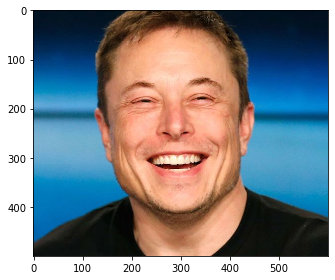

In [2]:
image = cv2.imread('./data/musk.jpg')
image = image [:,:,::-1]
io.imshow(image)

#### Image thresholding

- The primary reason is for segmenting images,  we will actually remove the background. For doing this ,we will convert the image to gray scale and then to binary image this contains only black and white.

- Types:
    - Binary : If pixel is greater than reference (wegive) convert to 255 else to 0
    - BinaryInverted: If pixel is greater than reference (wegive) convert to 0 else to 255
    
    - Truncated: If pixel is greater than threshold change it to threshold if not dont do anything
    - Threshold to zero : if pixel is greater that threshold, make it threshold else 0
    - threshold to zero inverted : if pixel is greater that threshold, make it 0 else no change

 - You have a method called cv2.threshold (image ,a,b,which technique)
   - 0 - Binary
   - 1 - bI
   - 2 - T
   - 3 - TtoZero
   - 4 - TtoZeroI

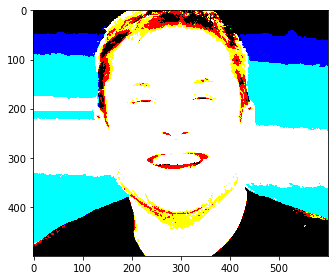

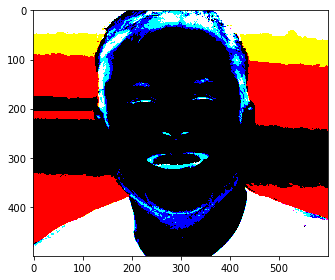

In [3]:
_,img1 = cv2.threshold(image,50,255,0)
_,img2 = cv2.threshold(image,50,255,1)
#lets look at the images
figure(0)
io.imshow(img1)
figure(1)
io.imshow(img2)


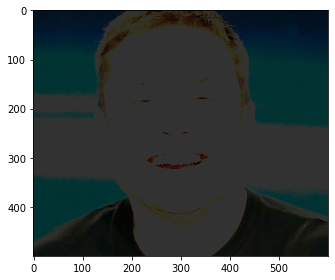

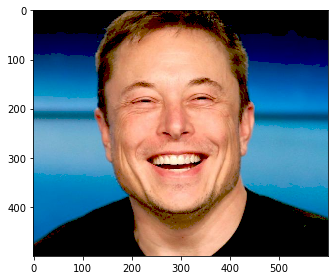

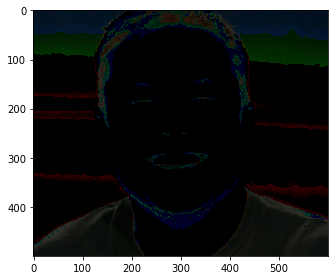

In [4]:
_,img3 = cv2.threshold(image,50,255,2)
_,img4 = cv2.threshold(image,50,255,3)
_,img5 = cv2.threshold(image,50,255,4)
figure(0)
io.imshow(img3)
figure(1)
io.imshow(img4)
figure(2)
io.imshow(img5)

### Advanced OpenCV operations

- Blending two images 
- Changing the contrast and brightness
- Adding some text to the images
- Smoothing images
- Calculating the gradients to detect edges
- Perform Histogram equalizer

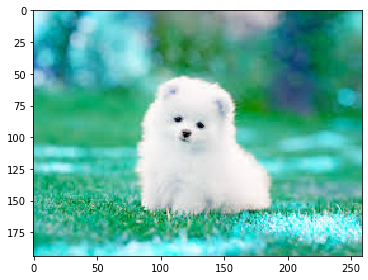

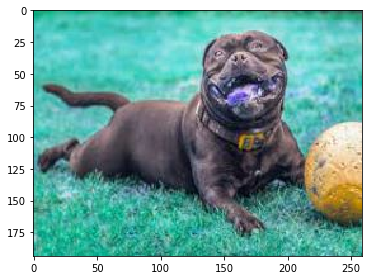

In [6]:
dog1 = cv2.imread("./data/dog_1.jpeg")
dog2 = cv2.imread("./data/dog_2.jpeg")
figure(0)
io.imshow(dog1)
figure(1)
io.imshow(dog2)

In [11]:
print(dog1.shape)
print(dog2.shape)

(194, 259, 3)
(194, 259, 3)


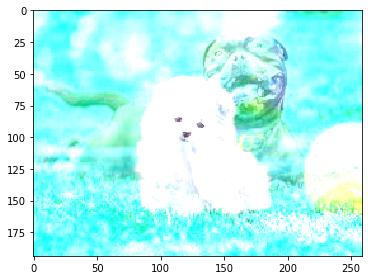

In [10]:
#Defining alpha and beta parameters
alpha = 1
beta = 1.0 
blended_image = cv2.addWeighted(dog1,alpha,dog2,beta,0.25)
io.imshow(blended_image)

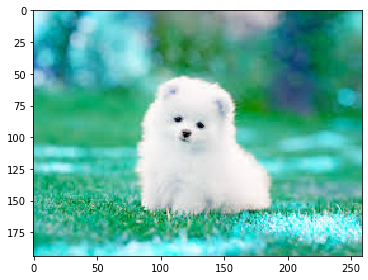

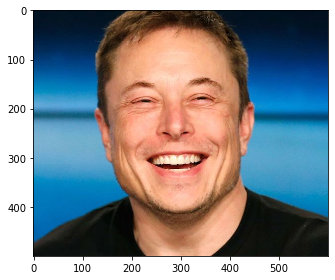

In [15]:
#Trying on different sized images
dog1 = cv2.imread("./data/dog_1.jpeg")
musk = cv2.imread("./data/musk.jpg")
musk= musk[:,:,::-1]
figure(0)
io.imshow(dog1)
figure(1)
io.imshow(musk)

In [17]:
# #Defining alpha and beta parameters
# alpha = 0.6
# beta = 0.5 
# blended_image = cv2.addWeighted(dog1,alpha,musk,beta,0.25)
# io.imshow(blended_image)

In [18]:
musk = cv2.imread("./data/musk.jpg")


In [19]:
musk[0]

array([[35, 19,  2],
       [35, 19,  2],
       [35, 19,  2],
       ...,
       [32, 15,  2],
       [32, 15,  2],
       [32, 15,  2]], dtype=uint8)

In [22]:
musk_new = musk[:,:,::-1]

In [23]:
musk_new[0]

array([[ 2, 19, 35],
       [ 2, 19, 35],
       [ 2, 19, 35],
       ...,
       [ 2, 15, 32],
       [ 2, 15, 32],
       [ 2, 15, 32]], dtype=uint8)

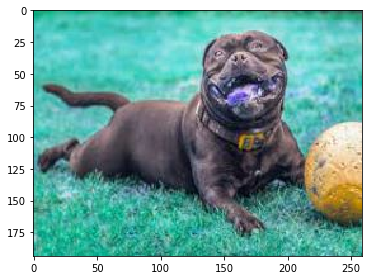

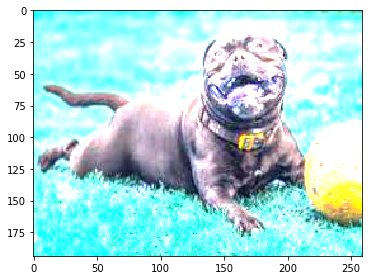

In [27]:
#Contrast: Contrast in the image is the difference between the maximum pixel and 
#minimum pixel intensity
#Brightness: Refers to the lightness or darkness of an image to brighted an image we add a 
#constant value to all the pixels

import cv2
import numpy as np
img = cv2.imread("./data/dog_2.jpeg")

new_img = np.zeros(img.shape,img.dtype)

contrast = 2.0

brightness = 2

#changing the brightness and contrast of the image
for y in range(img.shape[0]):
    for x in range(img.shape[1]):
        for c in range(img.shape[2]):
            new_img[y,x,c] = np.clip(contrast*img[y,x,c]+brightness,0,255)

figure(0)
io.imshow(img)
figure(1)
io.imshow(new_img)
            


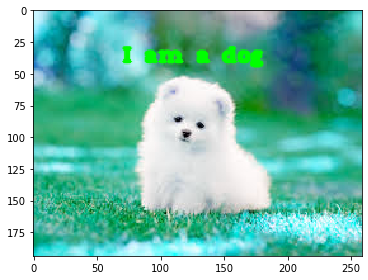

In [28]:
#Adding some text to the images
from skimage import io
import cv2
import numpy as np

image = cv2.imread('./data/dog_1.jpeg')
font = cv2.FONT_HERSHEY_COMPLEX_SMALL
cv2.putText(image,"I am a dog",(70,40),font,0.8,(0,255,0),2,cv2.LINE_AA)
io.imshow(image)


### Image smoothing:

 - Median Filter
 
 - Gaussian Filter
 
 - Bilateral Filter

#### Median Filter:

- This is one of the most basic image smoothing fiters, its a non-linear filter that removes black and white noise from the image , how? It does this by finding the median using neighbouring pixels.

- To perform this , to smooth an image using median filter first it looks at 3 X 3 image and finds the median in that and imputes the cetral value with median and this step is repeated until all pixels are reached.

- If you want to preserve your edges after smoothing , median filter is the best filter 

- cv2.medianBlur


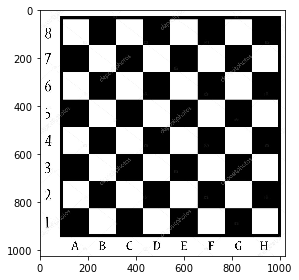

In [29]:
image_original = cv2.imread('./data/chess_board.jpeg')
io.imshow(image_original)

In [30]:
image_original.shape

(1024, 1024, 3)

In [36]:
image_medianblur = cv2.medianBlur(image_original,9)

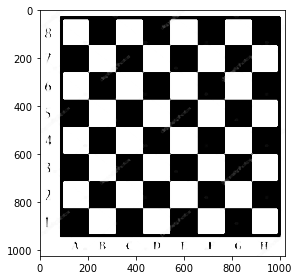

In [37]:
io.imshow(image_medianblur)

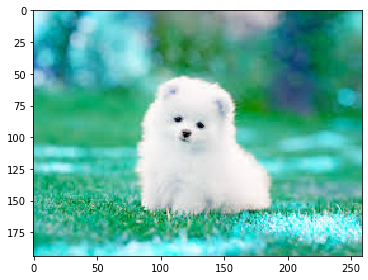

In [39]:
image_original = cv2.imread('./data/dog_1.jpeg')
io.imshow(image_original)

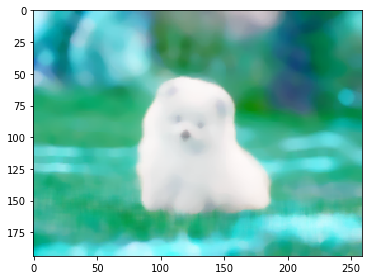

In [41]:
image_medianblur = cv2.medianBlur(image_original,9)
io.imshow(image_medianblur)

Text(0.5, 1.0, 'Blurred Image')

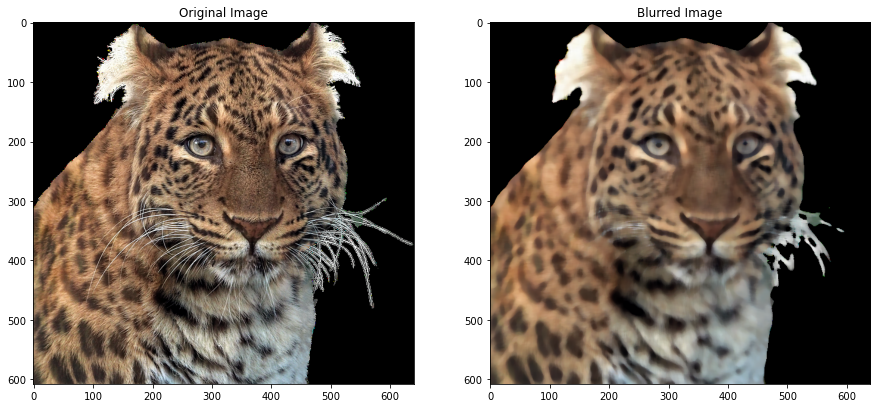

In [63]:
imagepath = './data/panther.png'
image_original = cv2.imread(imagepath)
image_medianblur = cv2.medianBlur(image_original,9)
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image_original[:,:,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(image_medianblur[:,:,::-1]);plt.title("Blurred Image")

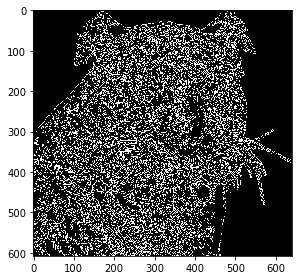

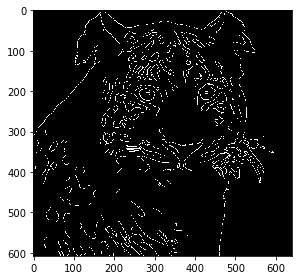

In [64]:
#Edge using canny


canny_original = cv2.Canny(image_original,100,200)
canny_blurred = cv2.Canny(image_medianblur,100,200)
figure(0)
io.imshow(canny_original)
figure(1)
io.imshow(canny_blurred)

#### Gaussian Filter:

- This filter depends on the standard deviation of the image, and assumes that mean is zero.we can still say mean as a non - zero , and this filter doesnt take care about edges

Text(0.5, 1.0, 'Blurred Image')

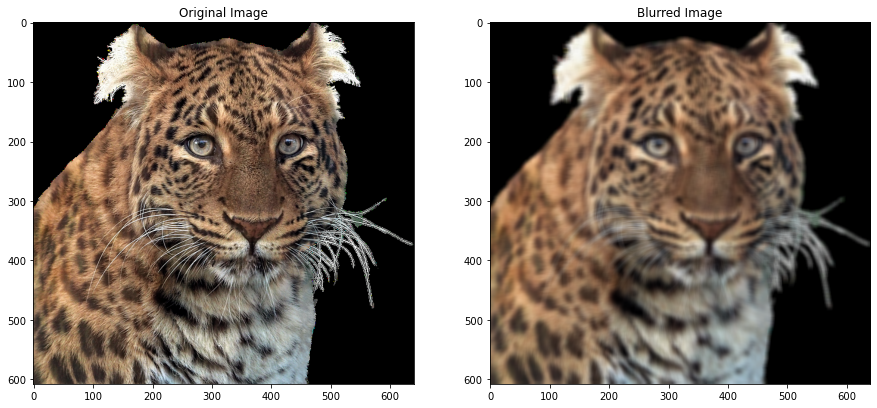

In [65]:
imagepath = './data/panther.png'
image_original = cv2.imread(imagepath)
image_gaussianblur = cv2.GaussianBlur(image_original,(9,9),40)
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image_original[:,:,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(image_gaussianblur[:,:,::-1]);plt.title("Blurred Image")

/Users/saandeep.sreerambatl/anaconda3/lib/python3.8/site-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


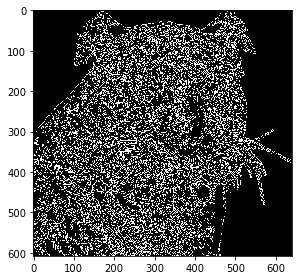

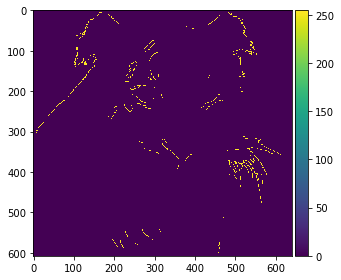

In [66]:
#Edge using canny


canny_original = cv2.Canny(image_original,100,200)
canny_blurred = cv2.Canny(image_gaussianblur,100,200)
figure(0)
io.imshow(canny_original)
figure(1)
io.imshow(canny_blurred)

#### Bilateral Filter:
- If you want to smooth image and keep edges intact , we will use bilateral filter.
- We will replace the values with the average of the neghbors
- This is a non - linear smoothing approach 
- how negibors are defined?
    - Two pixel value are close to each other (means number)
    - Two pixel values are similar (color)
    
- cv2.Bilateralfilter takes 4 params:
    - Image we want to smooth
    - Diameter of the pixel neighborhood
    - Sigma value for color (to identify pixels which are similar)
    - Sigma value for space( to find pixels which are close)

Text(0.5, 1.0, 'Blurred Image')

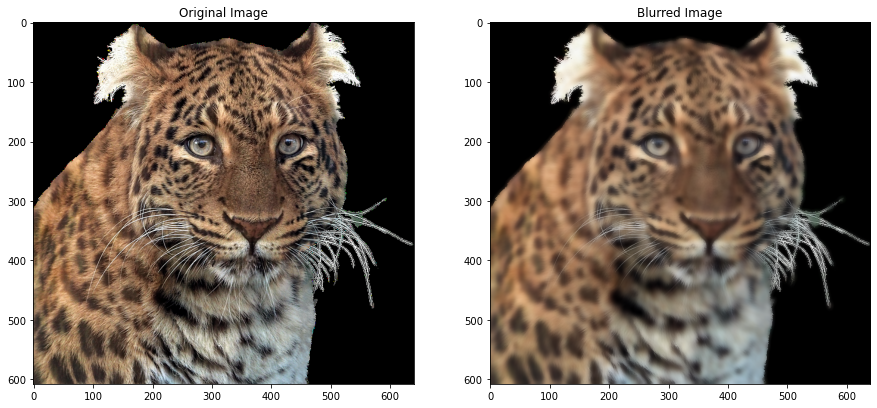

In [52]:
imagepath = './data/panther.png'
image_original = cv2.imread(imagepath)
image_bilateralfilter = cv2.bilateralFilter(image_original,12,300,300)
plt.figure(figsize=[15,15])
plt.subplot(121);plt.imshow(image_original[:,:,::-1]);plt.title("Original Image")
plt.subplot(122);plt.imshow(image_bilateralfilter[:,:,::-1]);plt.title("Blurred Image")

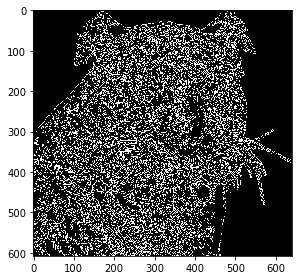

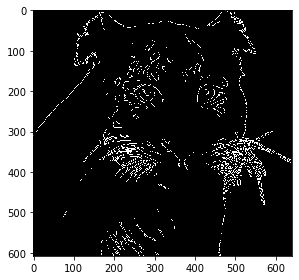

In [67]:
#Edge using canny


canny_original = cv2.Canny(image_original,100,200)
canny_blurred = cv2.Canny(image_bilateralfilter,100,200)
figure(0)
io.imshow(canny_original)
figure(1)
io.imshow(canny_blurred)

#### Performing Histogram Equalization

 - Histogram equalization is used to adjust the contrast of the image. We first plot the histogram of pixel intensity distribution and then modify it. The cummulative probability function associated with every image. 
 - cv2.equalizeHist()

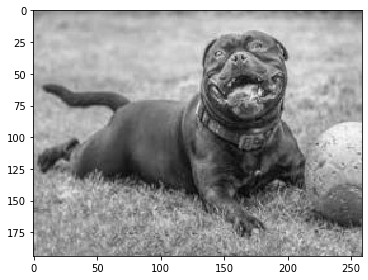

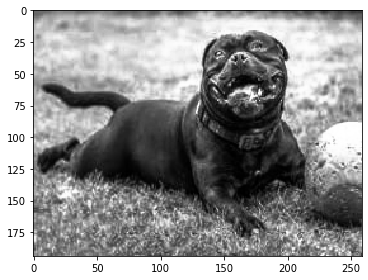

In [68]:
image = cv2.imread('./data/dog_2.jpeg')
image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
src_eqlzd = cv2.equalizeHist(image)
figure(0)
io.imshow(image)
figure(1)
io.imshow(src_eqlzd)

In [69]:
#Scale invariant feature transform
# Ransac algorithm
#https://blog.ekbana.com/extracting-invariant-features-from-images-using-sift-for
#-key-point-matching-675f818ce199

### Sobel function:

- Sobel function helps in calculating the edges, edges are found in two directions horizontal and vertical.
- Apply blur to remove noise convert the image the gray scale.

- Parameters:
    - Source is source
    - Depth - the more depth you give more likely edges are not missed
    - default = -1, means same as input
    - dx dy these are actually your order of derivaties
    - size of kernel


(1024, 1024, 3)
(1024, 1024)


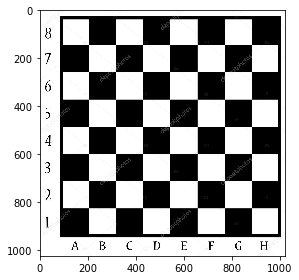

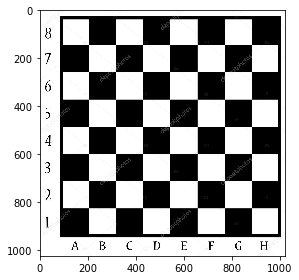

In [74]:
image_original = cv2.imread('./data/chess_board.jpeg')
print(image_original.shape)
image_original = cv2.cvtColor(image_original,cv2.COLOR_BGR2GRAY)
print(image_original.shape)
figure(0)
io.imshow(image_original)
figure(1)
io.imshow(image_original)

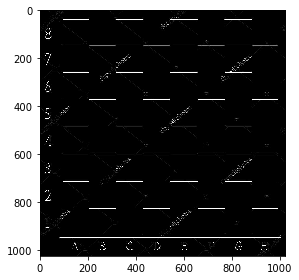

In [80]:
sobelx = cv2.Sobel(image_original,-1,0,1,ksize=3)
io.imshow(sobelx)

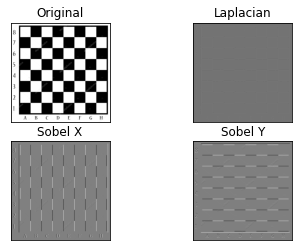

In [76]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('./data/chess_board.jpeg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])

plt.show()